## 대한민국 (South Korea) 관련 데이터 분석

*표본이 적어 분석의 신뢰성이 부족함

In [1]:
import pandas as pd

df_2019 = pd.read_csv("datasets/2019.csv", sep=",")
print(f"2019: {df_2019.columns.tolist()}\n")

df_2018 = pd.read_csv("datasets/2018.csv", sep=",")
print(f"2018: {df_2018.columns.tolist()}\n")

df_2017 = pd.read_csv("datasets/2017.csv", sep=",")
print(f"2017: {df_2017.columns.tolist()}\n")

df_2016 = pd.read_csv("datasets/2016.csv", sep=",")
print(f"2016: {df_2016.columns.tolist()}\n")

df_2015 = pd.read_csv("datasets/2015.csv", sep=",")
print(f"2015: {df_2015.columns.tolist()}")

2019: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Fam

---

- Country: South Korea  
- Features: Score, Economy, Health, Freedom

In [2]:
def find_column(df, to_contain):
    mask = df.columns.str.contains(to_contain)
    col_name = df.columns[mask].values[0]
    return col_name

def get_kor_values(df):
    country = find_column(df, "Country")
    score = find_column(df, "Score")
    gdp = find_column(df, "GDP")
    health = find_column(df, "Health")
    freedom = find_column(df, "Freedom")
    df_kor = df.loc[df[country] == "South Korea", [score, gdp, health, freedom]]
    values = df_kor.values.flatten().tolist()
    return values

In [3]:
kor_2019 = get_kor_values(df_2019)
kor_2018 = get_kor_values(df_2018)
kor_2017 = get_kor_values(df_2017)
kor_2016 = get_kor_values(df_2016)
kor_2015 = get_kor_values(df_2015)

In [4]:
values = [kor_2015, kor_2016, kor_2017, kor_2018, kor_2019]
index_names = [str(n) for n in range(2015, 2020)]

df_kor = pd.DataFrame(values, index=index_names)
df_kor.columns = ["Score", "Economy", "Health", "Freedom"]
df_kor

,Score,Economy,Health,Freedom
2015,5.984,1.244610,0.965380,0.332080
2016,5.835,1.359480,0.886450,0.251680
2017,5.838,1.401678,0.900214,0.257922
2018,5.875,1.266000,0.955000,0.244000
2019,5.895,1.301000,1.036000,0.159000


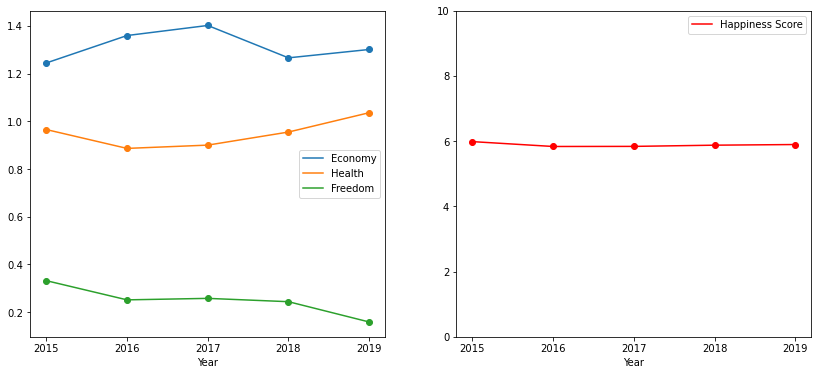

In [5]:
import matplotlib.pyplot as plt

years = df_kor.index
cols = df_kor.columns

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.2)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for col in cols[1:]:
    value = df_kor[col].values.flatten().tolist()
    ax1.scatter(years, value)
    ax1.plot(years, value, label=col)
ax1.set_xlabel("Year")
ax1.legend()

scores = df_kor["Score"].values.flatten().tolist()
ax2.scatter(years, scores, color="r")
ax2.plot(years, scores, label="Happiness Score", color="r")
ax2.set_ylim([0, 10])
ax2.set_xlabel("Year")
ax2.legend()

plt.show()